In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'archive/data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


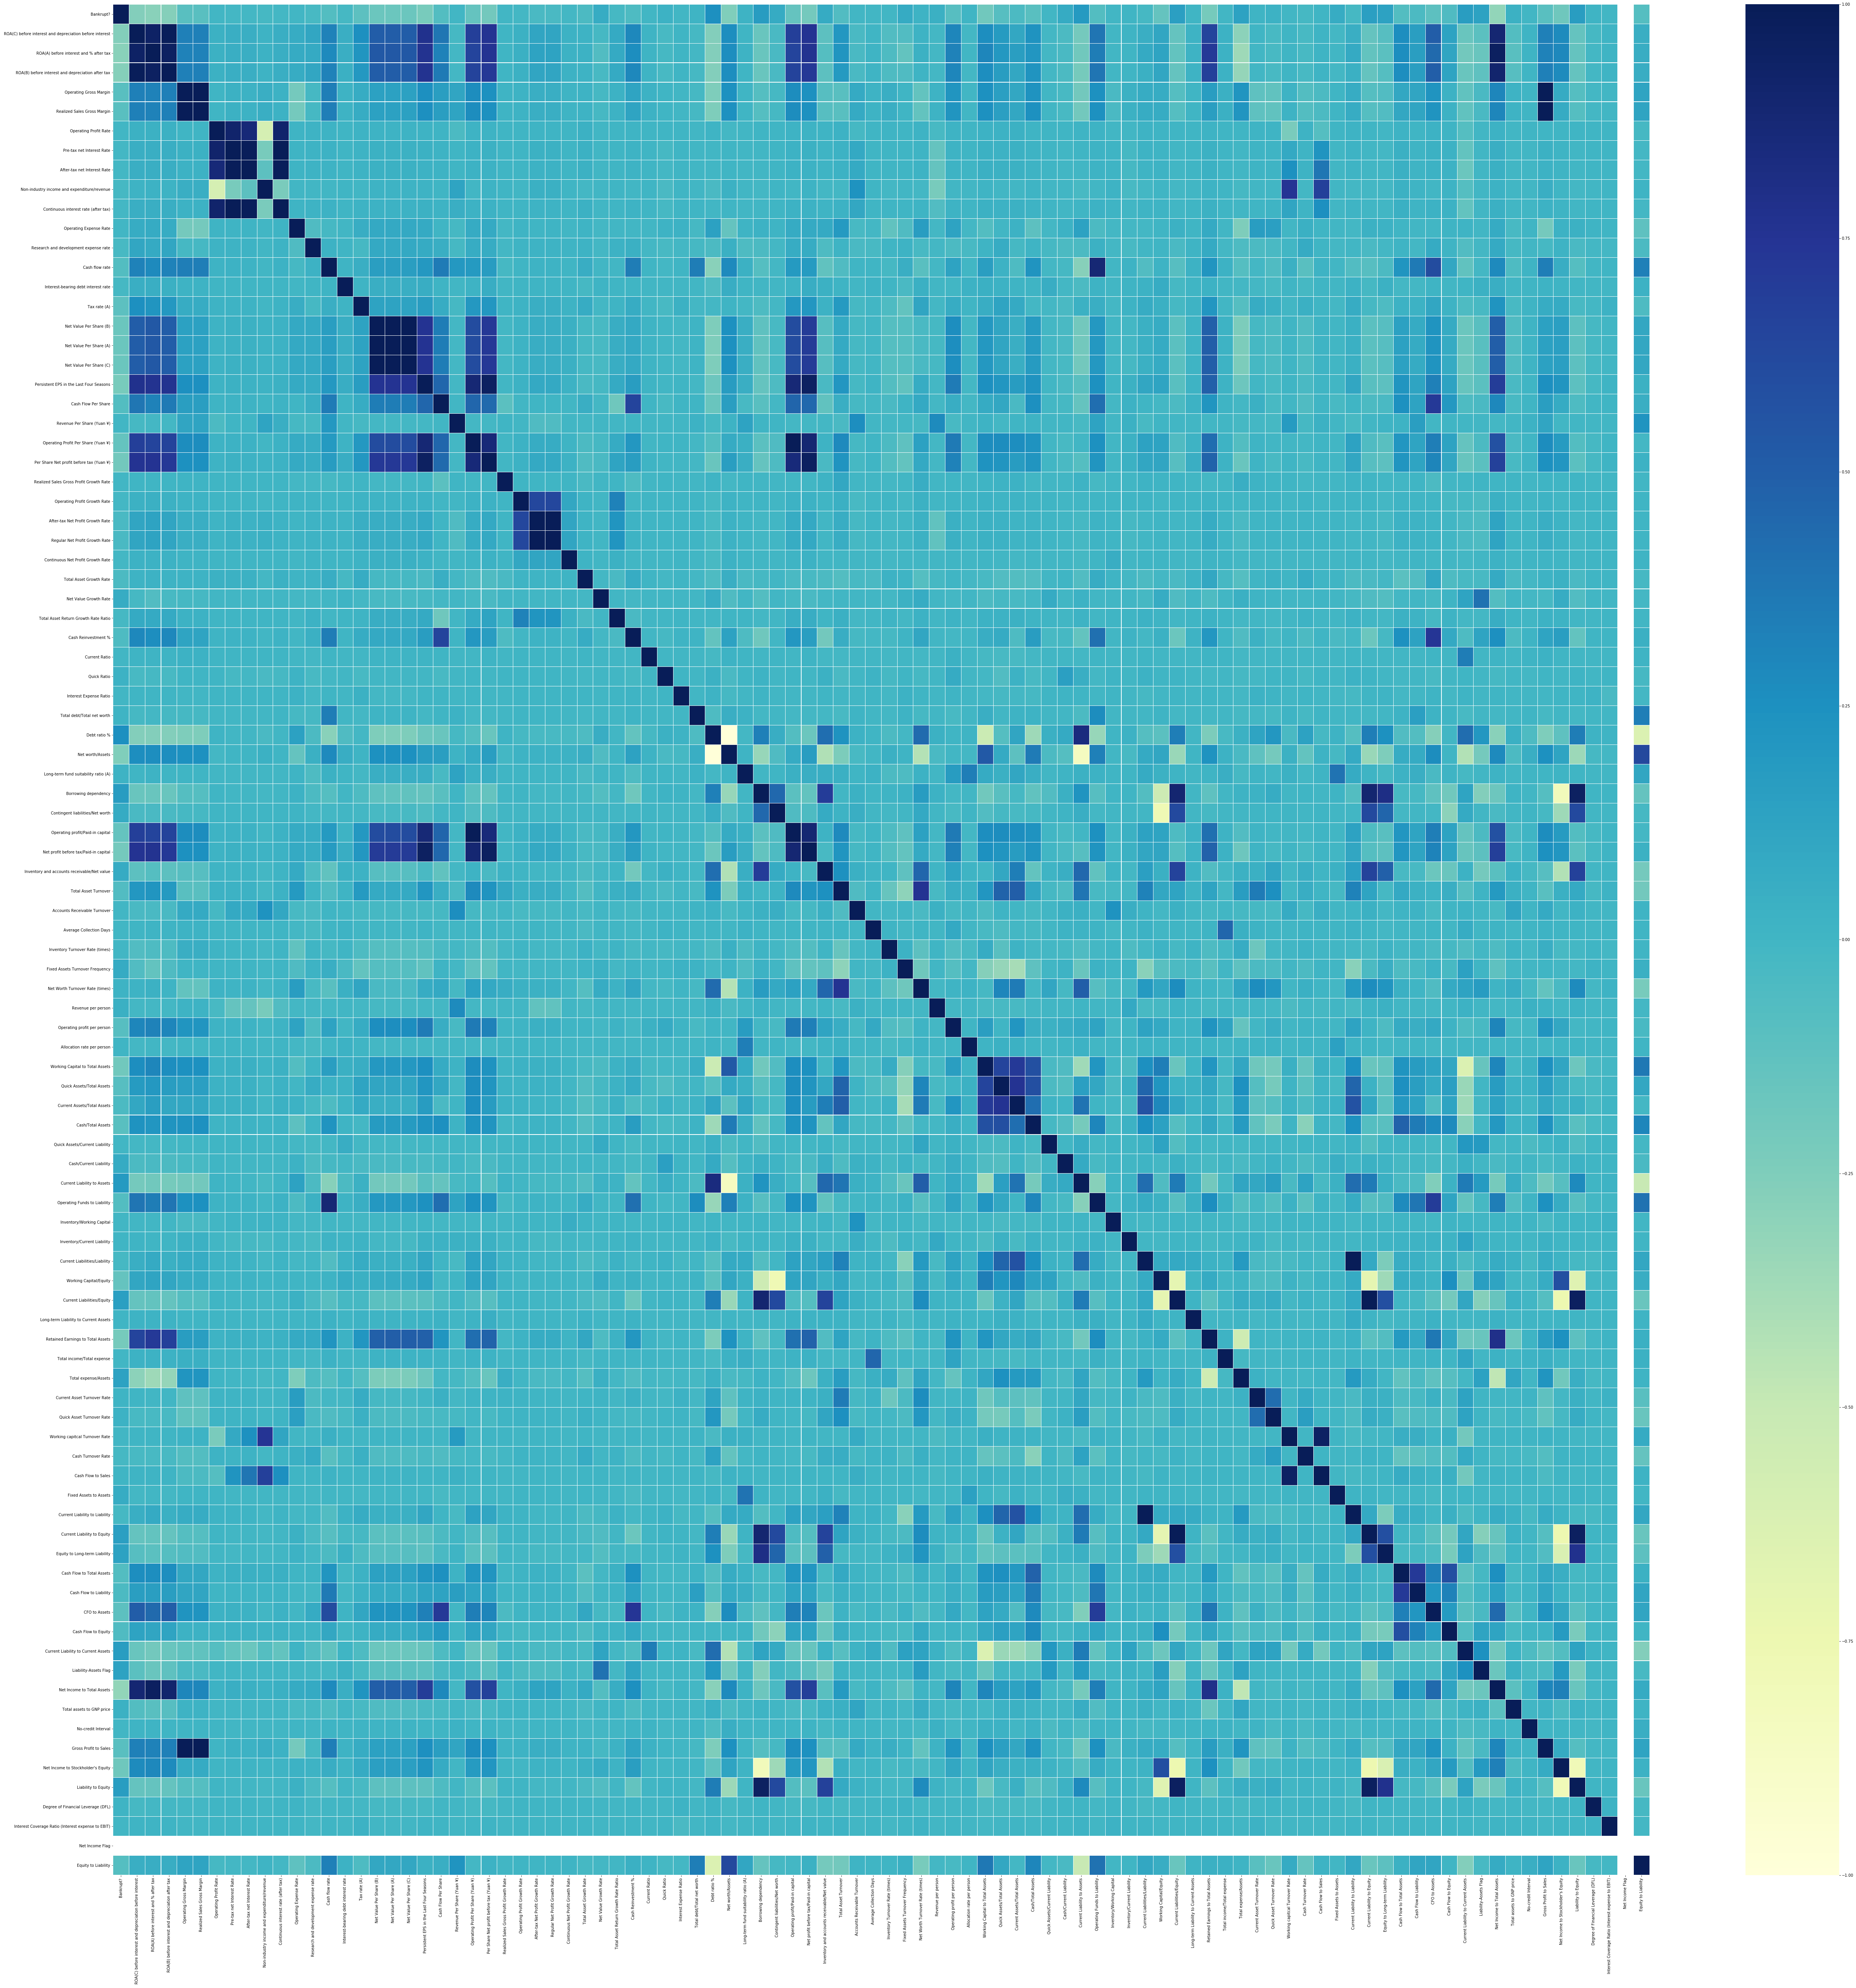

In [17]:
corrmat = data.corr()

  

f, ax = plt.subplots(figsize =(90, 90))

sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [48]:
len(data[data['Bankrupt?'] == 0]), len(data[data['Bankrupt?'] == 1])

(6599, 220)

In [65]:
stable  = data[data['Bankrupt?'] == 0][:220]
unstable = data[data['Bankrupt?'] == 1]

norm_data = pd.concat([stable, unstable])

X_data = norm_data.iloc[:, 1:]
y_data = norm_data['Bankrupt?']
X_data

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,0.781180,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,0.781621,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,0.781598,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,0.781574,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801
10,0.482475,0.567543,0.538198,0.614026,0.614026,0.998978,0.797535,0.809460,0.303759,0.781629,...,0.814111,0.076972,0.623687,0.614021,0.841337,0.278356,0.026971,0.565892,1,0.036572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6591,0.418515,0.433984,0.461427,0.612750,0.612750,0.998864,0.796902,0.808857,0.302892,0.781254,...,0.725750,0.000487,0.623730,0.612747,0.828067,0.292648,0.026666,0.564481,1,0.015620
6640,0.196802,0.211023,0.221425,0.598056,0.598056,0.998933,0.796144,0.808149,0.301423,0.780388,...,0.519388,0.017588,0.623465,0.598051,0.856906,0.259280,0.026769,0.565052,1,0.003946
6641,0.337640,0.254307,0.378446,0.590842,0.590842,0.998869,0.796943,0.808897,0.302953,0.781340,...,0.557733,0.000847,0.623302,0.590838,0.726888,0.336515,0.026777,0.565092,1,0.011797
6642,0.340028,0.344636,0.380213,0.581466,0.581466,0.998372,0.796292,0.808283,0.302857,0.780733,...,0.641804,0.000376,0.623497,0.581461,0.765967,0.337315,0.026722,0.564807,1,0.011777


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [71]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.metrics import plot_confusion_matrix, f1_score, classification_report

model = RidgeClassifier()

model.fit(X_train, y_train)

E:\Users\usov_\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.0657e-23): result may not be accurate.
  overwrite_a=True).T


RidgeClassifier()

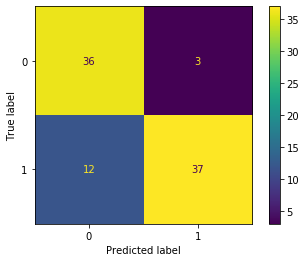

In [68]:
plot_confusion_matrix(model, X_test, y_test)

In [69]:
preds = model.predict(X_test)
f1_score(preds, y_test)

0.8314606741573034

In [70]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        39
           1       0.93      0.76      0.83        49

    accuracy                           0.83        88
   macro avg       0.84      0.84      0.83        88
weighted avg       0.85      0.83      0.83        88



In [72]:
model2 = LogisticRegression()

model2.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.55      0.90      0.68        39
           1       0.83      0.41      0.55        49

    accuracy                           0.62        88
   macro avg       0.69      0.65      0.61        88
weighted avg       0.71      0.62      0.61        88



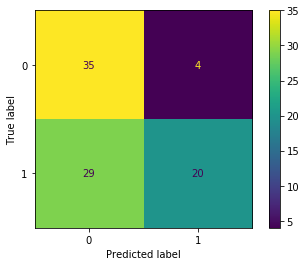

In [76]:
preds = model2.predict(X_test)
print(classification_report(y_test, preds))
plot_confusion_matrix(model2, X_test, y_test)

In [116]:
model3 = SGDClassifier()

model3.fit(X_train, y_train)

SGDClassifier()

              precision    recall  f1-score   support

           0       0.54      0.49      0.51        39
           1       0.62      0.67      0.65        49

    accuracy                           0.59        88
   macro avg       0.58      0.58      0.58        88
weighted avg       0.59      0.59      0.59        88



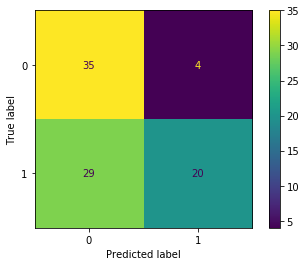

In [117]:
preds = model3.predict(X_test)
print(classification_report(y_test, preds))
plot_confusion_matrix(model2, X_test, y_test)

In [120]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

model4 = GaussianNB()

model4.fit(X_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.45      0.97      0.62        39
           1       0.75      0.06      0.11        49

    accuracy                           0.47        88
   macro avg       0.60      0.52      0.37        88
weighted avg       0.62      0.47      0.34        88



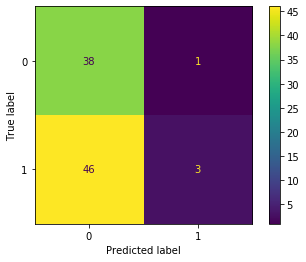

In [123]:
preds = model4.predict(X_test)
print(classification_report(y_test, preds))
plot_confusion_matrix(model4, X_test, y_test)

              precision    recall  f1-score   support

           0       0.45      0.97      0.62        39
           1       0.75      0.06      0.11        49

    accuracy                           0.47        88
   macro avg       0.60      0.52      0.37        88
weighted avg       0.62      0.47      0.34        88



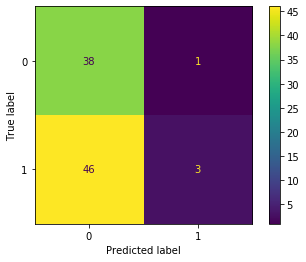

In [124]:
model5 = GaussianNB()

model5.fit(X_train, y_train)

preds = model5.predict(X_test)
print(classification_report(y_test, preds))
plot_confusion_matrix(model5, X_test, y_test)

              precision    recall  f1-score   support

           0       0.48      0.69      0.57        39
           1       0.62      0.41      0.49        49

    accuracy                           0.53        88
   macro avg       0.55      0.55      0.53        88
weighted avg       0.56      0.53      0.53        88



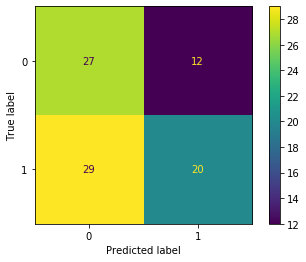

In [137]:
from sklearn.neural_network import MLPClassifier

model6 = MLPClassifier(random_state=1, max_iter=10000)
model6.fit(X_train, y_train)

preds = model6.predict(X_test)
print(classification_report(y_test, preds))
plot_confusion_matrix(model6, X_test, y_test)

In [142]:
from catboost import CatBoostClassifier

model7 = CatBoostClassifier()

model7.fit(X_train, y_train)

Learning rate set to 0.006596
0:	learn: 0.6858438	total: 43ms	remaining: 42.9s
1:	learn: 0.6779187	total: 75.6ms	remaining: 37.7s
2:	learn: 0.6713055	total: 107ms	remaining: 35.5s
3:	learn: 0.6646767	total: 138ms	remaining: 34.3s
4:	learn: 0.6575825	total: 177ms	remaining: 35.3s
5:	learn: 0.6510898	total: 211ms	remaining: 35s
6:	learn: 0.6446046	total: 239ms	remaining: 33.9s
7:	learn: 0.6374467	total: 274ms	remaining: 34s
8:	learn: 0.6314168	total: 301ms	remaining: 33.1s
9:	learn: 0.6253505	total: 331ms	remaining: 32.7s
10:	learn: 0.6195800	total: 367ms	remaining: 33s
11:	learn: 0.6136097	total: 399ms	remaining: 32.8s
12:	learn: 0.6079500	total: 435ms	remaining: 33.1s
13:	learn: 0.6028373	total: 469ms	remaining: 33.1s
14:	learn: 0.5958750	total: 498ms	remaining: 32.7s
15:	learn: 0.5904021	total: 567ms	remaining: 34.9s
16:	learn: 0.5841095	total: 604ms	remaining: 34.9s
17:	learn: 0.5780920	total: 637ms	remaining: 34.7s
18:	learn: 0.5724471	total: 665ms	remaining: 34.4s
19:	learn: 0.5669

163:	learn: 0.2129595	total: 5.47s	remaining: 27.9s
164:	learn: 0.2120296	total: 5.5s	remaining: 27.8s
165:	learn: 0.2108818	total: 5.53s	remaining: 27.8s
166:	learn: 0.2099258	total: 5.56s	remaining: 27.7s
167:	learn: 0.2089892	total: 5.59s	remaining: 27.7s
168:	learn: 0.2077187	total: 5.61s	remaining: 27.6s
169:	learn: 0.2067620	total: 5.64s	remaining: 27.5s
170:	learn: 0.2054503	total: 5.67s	remaining: 27.5s
171:	learn: 0.2042924	total: 5.7s	remaining: 27.4s
172:	learn: 0.2032129	total: 5.73s	remaining: 27.4s
173:	learn: 0.2022872	total: 5.75s	remaining: 27.3s
174:	learn: 0.2011789	total: 5.78s	remaining: 27.2s
175:	learn: 0.2004162	total: 5.8s	remaining: 27.2s
176:	learn: 0.1996802	total: 5.83s	remaining: 27.1s
177:	learn: 0.1986468	total: 5.86s	remaining: 27s
178:	learn: 0.1978143	total: 5.88s	remaining: 27s
179:	learn: 0.1968157	total: 5.91s	remaining: 26.9s
180:	learn: 0.1959693	total: 5.94s	remaining: 26.9s
181:	learn: 0.1950834	total: 5.96s	remaining: 26.8s
182:	learn: 0.19405

323:	learn: 0.1166526	total: 10.3s	remaining: 21.4s
324:	learn: 0.1163723	total: 10.3s	remaining: 21.4s
325:	learn: 0.1160677	total: 10.3s	remaining: 21.4s
326:	learn: 0.1156813	total: 10.4s	remaining: 21.3s
327:	learn: 0.1153789	total: 10.4s	remaining: 21.3s
328:	learn: 0.1150379	total: 10.4s	remaining: 21.3s
329:	learn: 0.1147546	total: 10.5s	remaining: 21.2s
330:	learn: 0.1145179	total: 10.5s	remaining: 21.2s
331:	learn: 0.1140248	total: 10.5s	remaining: 21.2s
332:	learn: 0.1137547	total: 10.5s	remaining: 21.1s
333:	learn: 0.1133176	total: 10.6s	remaining: 21.1s
334:	learn: 0.1128374	total: 10.6s	remaining: 21s
335:	learn: 0.1125043	total: 10.6s	remaining: 21s
336:	learn: 0.1123258	total: 10.7s	remaining: 21s
337:	learn: 0.1119688	total: 10.7s	remaining: 20.9s
338:	learn: 0.1116485	total: 10.7s	remaining: 20.9s
339:	learn: 0.1112895	total: 10.7s	remaining: 20.8s
340:	learn: 0.1110008	total: 10.8s	remaining: 20.8s
341:	learn: 0.1105919	total: 10.8s	remaining: 20.8s
342:	learn: 0.1102

482:	learn: 0.0762695	total: 14.9s	remaining: 16s
483:	learn: 0.0760888	total: 15s	remaining: 16s
484:	learn: 0.0759275	total: 15s	remaining: 15.9s
485:	learn: 0.0757493	total: 15s	remaining: 15.9s
486:	learn: 0.0755696	total: 15s	remaining: 15.8s
487:	learn: 0.0754816	total: 15.1s	remaining: 15.8s
488:	learn: 0.0751997	total: 15.1s	remaining: 15.8s
489:	learn: 0.0749880	total: 15.1s	remaining: 15.7s
490:	learn: 0.0747815	total: 15.2s	remaining: 15.7s
491:	learn: 0.0746188	total: 15.2s	remaining: 15.7s
492:	learn: 0.0744021	total: 15.2s	remaining: 15.6s
493:	learn: 0.0742108	total: 15.2s	remaining: 15.6s
494:	learn: 0.0740313	total: 15.3s	remaining: 15.6s
495:	learn: 0.0738830	total: 15.3s	remaining: 15.5s
496:	learn: 0.0736850	total: 15.3s	remaining: 15.5s
497:	learn: 0.0735162	total: 15.4s	remaining: 15.5s
498:	learn: 0.0733819	total: 15.4s	remaining: 15.4s
499:	learn: 0.0732903	total: 15.4s	remaining: 15.4s
500:	learn: 0.0731007	total: 15.4s	remaining: 15.4s
501:	learn: 0.0729827	to

643:	learn: 0.0539606	total: 20.4s	remaining: 11.3s
644:	learn: 0.0538109	total: 20.4s	remaining: 11.2s
645:	learn: 0.0536492	total: 20.4s	remaining: 11.2s
646:	learn: 0.0536162	total: 20.5s	remaining: 11.2s
647:	learn: 0.0535501	total: 20.5s	remaining: 11.1s
648:	learn: 0.0534476	total: 20.5s	remaining: 11.1s
649:	learn: 0.0533167	total: 20.5s	remaining: 11.1s
650:	learn: 0.0532207	total: 20.6s	remaining: 11s
651:	learn: 0.0530466	total: 20.6s	remaining: 11s
652:	learn: 0.0529717	total: 20.6s	remaining: 11s
653:	learn: 0.0528219	total: 20.7s	remaining: 10.9s
654:	learn: 0.0527166	total: 20.7s	remaining: 10.9s
655:	learn: 0.0525933	total: 20.7s	remaining: 10.9s
656:	learn: 0.0524410	total: 20.7s	remaining: 10.8s
657:	learn: 0.0523333	total: 20.8s	remaining: 10.8s
658:	learn: 0.0522043	total: 20.8s	remaining: 10.8s
659:	learn: 0.0520953	total: 20.8s	remaining: 10.7s
660:	learn: 0.0519523	total: 20.8s	remaining: 10.7s
661:	learn: 0.0519037	total: 20.9s	remaining: 10.6s
662:	learn: 0.0518

805:	learn: 0.0397165	total: 25.3s	remaining: 6.09s
806:	learn: 0.0396019	total: 25.3s	remaining: 6.06s
807:	learn: 0.0394957	total: 25.4s	remaining: 6.03s
808:	learn: 0.0393992	total: 25.4s	remaining: 6s
809:	learn: 0.0393036	total: 25.4s	remaining: 5.96s
810:	learn: 0.0392545	total: 25.5s	remaining: 5.93s
811:	learn: 0.0391780	total: 25.5s	remaining: 5.9s
812:	learn: 0.0390940	total: 25.5s	remaining: 5.87s
813:	learn: 0.0390095	total: 25.5s	remaining: 5.84s
814:	learn: 0.0389228	total: 25.6s	remaining: 5.8s
815:	learn: 0.0388540	total: 25.6s	remaining: 5.77s
816:	learn: 0.0387778	total: 25.6s	remaining: 5.74s
817:	learn: 0.0387630	total: 25.7s	remaining: 5.71s
818:	learn: 0.0386953	total: 25.7s	remaining: 5.68s
819:	learn: 0.0386350	total: 25.7s	remaining: 5.65s
820:	learn: 0.0385558	total: 25.8s	remaining: 5.62s
821:	learn: 0.0385427	total: 25.8s	remaining: 5.59s
822:	learn: 0.0384788	total: 25.8s	remaining: 5.56s
823:	learn: 0.0383804	total: 25.9s	remaining: 5.53s
824:	learn: 0.038

968:	learn: 0.0296837	total: 30.2s	remaining: 967ms
969:	learn: 0.0296333	total: 30.3s	remaining: 936ms
970:	learn: 0.0295655	total: 30.3s	remaining: 904ms
971:	learn: 0.0295094	total: 30.3s	remaining: 873ms
972:	learn: 0.0295007	total: 30.3s	remaining: 842ms
973:	learn: 0.0294479	total: 30.4s	remaining: 811ms
974:	learn: 0.0293935	total: 30.4s	remaining: 779ms
975:	learn: 0.0293271	total: 30.4s	remaining: 748ms
976:	learn: 0.0292975	total: 30.4s	remaining: 717ms
977:	learn: 0.0292686	total: 30.5s	remaining: 686ms
978:	learn: 0.0292304	total: 30.5s	remaining: 655ms
979:	learn: 0.0291895	total: 30.6s	remaining: 624ms
980:	learn: 0.0291517	total: 30.6s	remaining: 593ms
981:	learn: 0.0291099	total: 30.6s	remaining: 561ms
982:	learn: 0.0290468	total: 30.7s	remaining: 530ms
983:	learn: 0.0289913	total: 30.7s	remaining: 499ms
984:	learn: 0.0289382	total: 30.7s	remaining: 468ms
985:	learn: 0.0288723	total: 30.8s	remaining: 437ms
986:	learn: 0.0288004	total: 30.8s	remaining: 405ms
987:	learn: 

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        39
           1       1.00      0.88      0.93        49

    accuracy                           0.93        88
   macro avg       0.93      0.94      0.93        88
weighted avg       0.94      0.93      0.93        88



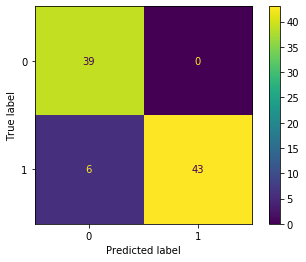

In [146]:
preds = model7.predict(X_test)
print(classification_report(y_test, preds))
plot_confusion_matrix(model7, X_test, y_test)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       220
           1       1.00      0.97      0.99       220

    accuracy                           0.99       440
   macro avg       0.99      0.99      0.99       440
weighted avg       0.99      0.99      0.99       440



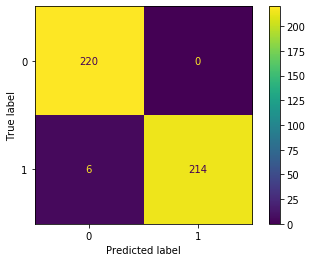

In [147]:
preds = model7.predict(X_data)
print(classification_report(y_data, preds))
plot_confusion_matrix(model7, X_data, y_data)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86      6599
           1       0.12      0.97      0.21       220

    accuracy                           0.76      6819
   macro avg       0.56      0.86      0.53      6819
weighted avg       0.97      0.76      0.84      6819



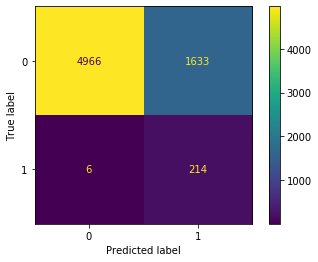

In [150]:
preds = model7.predict(data.iloc[:,1:])
print(classification_report(data['Bankrupt?'], preds))
plot_confusion_matrix(model7, data.iloc[:,1:], data['Bankrupt?'])